In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100

from src.eda import Analysis, Visualizations

In [43]:
train_data = pd.read_pickle('data/df_income_learn.pkl')
test_data = pd.read_pickle('data/df_income_test.pkl')

df_income_learn = train_data.copy()
df_income_test = test_data.copy()

In [3]:
df_income_learn.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
count,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000
mean,40.049946,75.850915,594.886230,51.011463,268.787709,2.648776,0.239381,1.853165,31.365046,94.489223,0.084733
std,19.047693,319.180793,5487.018219,316.587798,2313.427671,2.395149,0.634786,0.508680,23.437004,0.499886,0.278485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,49.000000,94.000000,0.000000
75%,52.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [4]:
df_income_test.head()

,age,class_of_worker,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,up_to_6th_grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,0
1,44,Self-employed-not incorporated,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,0
3,35,Private,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,0
4,49,Private,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,0
5,13,Not in universe,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


Update: try all analysis with age over 18

In [44]:
df_income_learn_over_18 = df_income_learn.loc[df_income_learn['age'] > 17]
df_income_learn_over_18.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
count,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000
mean,43.491445,83.130074,661.972396,55.671396,299.007419,2.878171,0.259146,1.985131,34.472514,94.498038,0.094462
std,16.913883,335.189310,5787.068449,330.547734,2440.800791,2.364397,0.656284,0.121029,22.438855,0.499998,0.292471
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,94.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,52.000000,94.000000,0.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [45]:
df_income_test_over_18 = df_income_test.loc[df_income_test['age'] > 17]
df_income_test_over_18.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income
count,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000
mean,43.711572,79.711722,633.273424,52.664530,286.319914,2.825832,0.257718,1.985012,33.853657,94.500598,0.092441
std,17.145960,324.175664,5622.291984,320.299264,2242.499118,2.373286,0.655072,0.121507,22.669956,0.500003,0.289650
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,52.000000,95.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,9900.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [47]:
df_income_test_over_18['income'].value_counts()

0    60732
1     6186
Name: income, dtype: int64

### Next step is to examine the continuous and categorical variables.

#### Continuous Variables

In [7]:
# There are 7 continuous variables
continuous_vars = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year']

In [9]:
# Pop the continuous variables so they are in their own dataframe.
df_income_learn_cont = Analysis(df_income_learn_over_18, continuous_vars).pop_columns()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
1,58,0,0,0,0,1,52
2,18,0,0,0,0,0,0
5,48,1200,0,0,0,1,52
6,42,0,5178,0,0,6,52
7,28,0,0,0,0,4,30


In [21]:
df_income_learn_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000
mean,43.491445,6.933104,36.939443,1.625333,32.095198,2.878171,34.472514
std,16.913883,22.983897,151.782861,9.372489,87.193838,2.364397,22.438855
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,3.000000,52.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,6.000000,52.000000
max,90.000000,83.130074,661.972396,55.671396,299.007419,6.000000,52.000000


In [10]:
# These should now only be the categorical variables.
df_income_learn_over_18.head()

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,year,income
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
2,Not in universe,high_school_no_graduate,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,95,0
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,95,0
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,0


In [11]:
# Do the same for test data.
df_income_test_cont = Analysis(df_income_test_over_18, continuous_vars).pop_columns()

In [12]:
# Pop labels from train and test as well.
income_learn_label = Analysis(df_income_learn_over_18, ['income']).pop_columns()
income_test_label = Analysis(df_income_test_over_18, ['income']).pop_columns()

In [13]:
income_learn_label.head()

,income
1,0
2,0
5,0
6,0
7,0


In [15]:
# These should now only be the categorical variables without income.
df_income_learn_over_18.head()

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,year
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
2,Not in universe,high_school_no_graduate,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,95
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,95
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95


#### Visualizations on train continuous data.

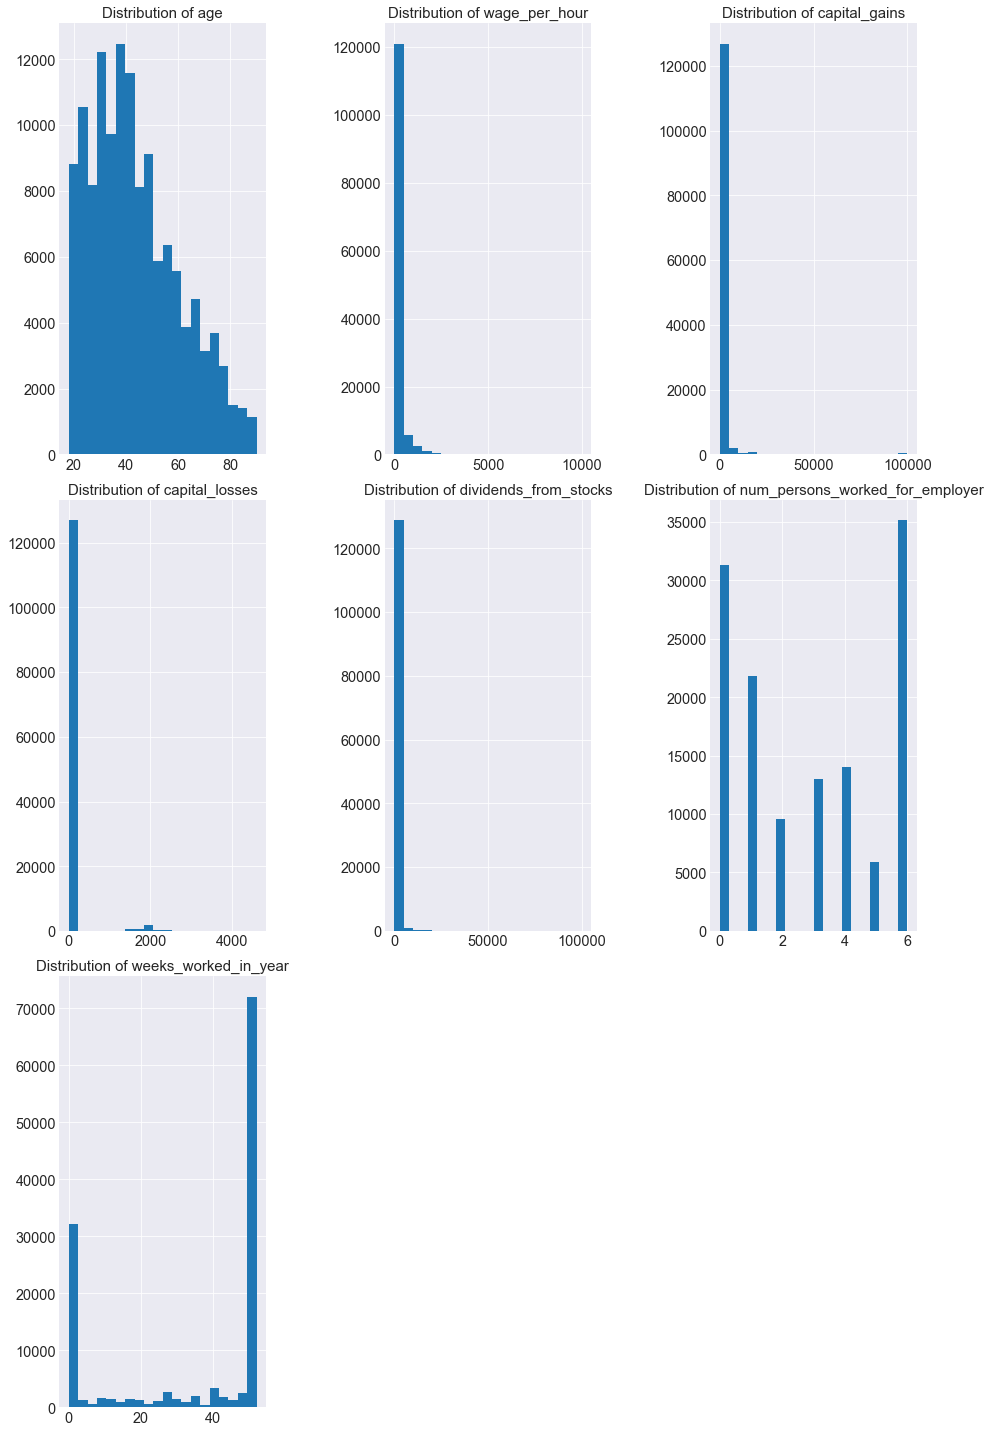

In [16]:
# Distributions of continuous variables
Visualizations(df_income_learn_cont, continuous_vars).histogram()

#### Outlier Analysis

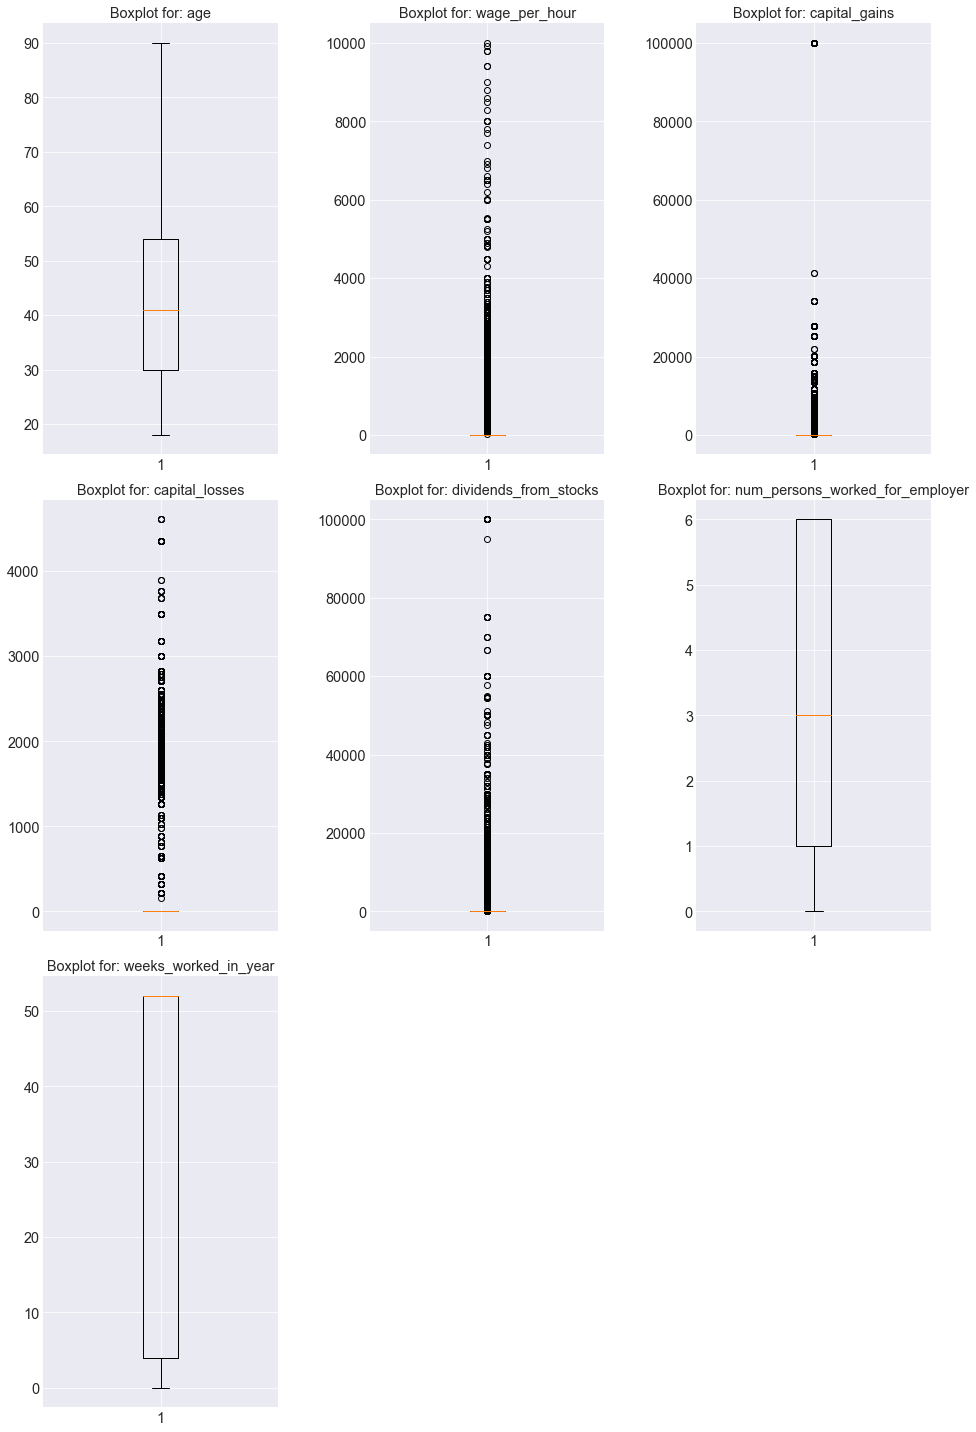

In [17]:
Visualizations(df_income_learn_cont, continuous_vars).boxplots()

In [18]:
# Replace these outliers with means.
outlier_variables = ['wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks']

for column in outlier_variables:
    Analysis(df_income_learn_cont, column).replace_outliers_with_means()

In [19]:
# Make sure outliers have been addressed.
df_income_learn_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000,130741.000000
mean,43.491445,6.933104,36.939443,1.625333,32.095198,2.878171,34.472514
std,16.913883,22.983897,151.782861,9.372489,87.193838,2.364397,22.438855
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,3.000000,52.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,6.000000,52.000000
max,90.000000,83.130074,661.972396,55.671396,299.007419,6.000000,52.000000


In [22]:
# Do the same with test data.
for column in outlier_variables:
    Analysis(df_income_test_cont, column).replace_outliers_with_means()
df_income_test_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000,66918.000000
mean,43.711572,6.420487,34.762583,1.475627,30.448253,2.825832,33.853657
std,17.145960,21.692683,144.081529,8.691194,83.296664,2.373286,22.669956
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,3.000000,52.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,6.000000,52.000000
max,90.000000,79.711722,633.273424,52.664530,286.319914,6.000000,52.000000


#### Correlations

In [23]:
# Correlations with continuous variables and income
df_income_learn_cont_with_label = pd.concat([df_income_learn_cont, income_learn_label], axis=1)
df_income_learn_cont_with_label.corr()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,income
age,1.000000,-0.106928,0.074275,0.013458,0.202416,-0.327952,-0.342870,0.053108
wage_per_hour,-0.106928,1.000000,-0.018515,-0.011066,-0.046535,0.148273,0.152605,-0.044835
capital_gains,0.074275,-0.018515,1.000000,-0.042204,0.090856,0.034144,0.056132,0.196504
capital_losses,0.013458,-0.011066,-0.042204,1.000000,0.045636,0.042947,0.056754,0.125584
dividends_from_stocks,0.202416,-0.046535,0.090856,0.045636,1.000000,-0.019285,-0.033560,0.240136
num_persons_worked_for_employer,-0.327952,0.148273,0.034144,0.042947,-0.019285,1.000000,0.616636,0.154161
weeks_worked_in_year,-0.342870,0.152605,0.056132,0.056754,-0.033560,0.616636,1.000000,0.195963
income,0.053108,-0.044835,0.196504,0.125584,0.240136,0.154161,0.195963,1.000000


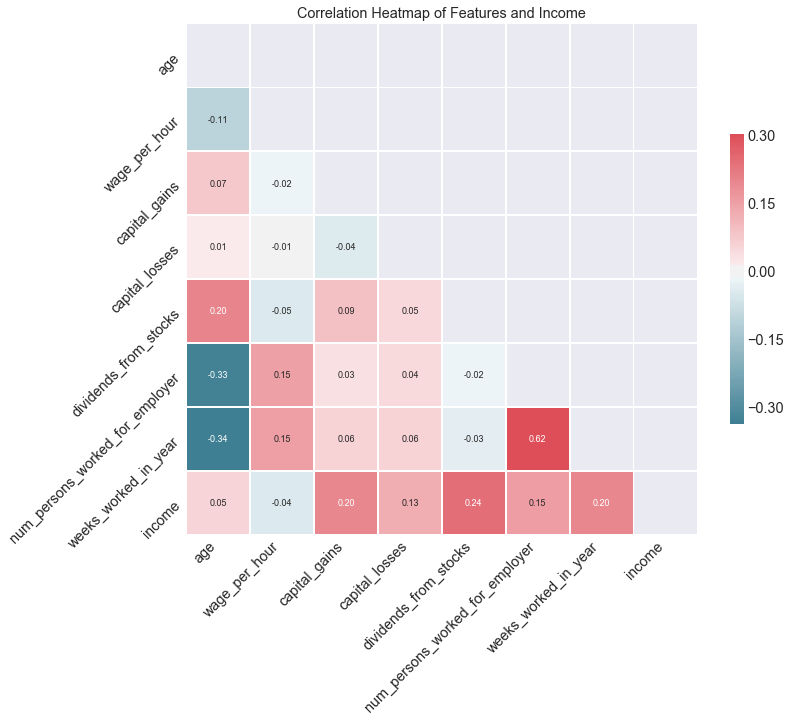

In [24]:
cont_vars_with_label = continuous_vars.append(income_learn_label)
Visualizations(df_income_learn_cont_with_label, continuous_vars).heatmap()

### Categorical Variables

In [25]:
df_income_learn_over_18.columns

Index(['class_of_worker', 'education', 'enroll_in_edu_inst_last_wk',
       'marital_stat', 'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'tax_filer_stat', 'region_of_previous_residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'family_members_under_18',
       'country_of_birth_father', 'country_of_birth_mother',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits',
       'year'],
      dtype='object')

In [26]:
# See values of the categorical variables
for column in df_income_learn_over_18:
    print(f"Unique values for {column}: {df_income_learn[column].unique()}")

Unique values for class_of_worker: [' Self-employed-not incorporated' ' Not in universe' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
Unique values for education: [' Some college but no degree' 'high_school_no_graduate'
 ' Bachelors degree(BA AB BS)' ' High school graduate' ' Children'
 ' Masters degree(MA MS MEng MEd MSW MBA)' 'up_to_6th_grade'
 ' Associates degree-academic program' ' 7th and 8th grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' Doctorate degree(PhD EdD)']
Unique values for enroll_in_edu_inst_last_wk: [' Not in universe' ' High school' ' College or university']
Unique values for marital_stat: [' Divorced' ' Never married' ' Married-civilian spouse present'
 ' Widowed' ' Separated' ' Married-spouse absent'
 ' Married-A F spouse present']
Unique values for major_industry_code: [' Construction' ' Not in universe or children' ' Entertainmen

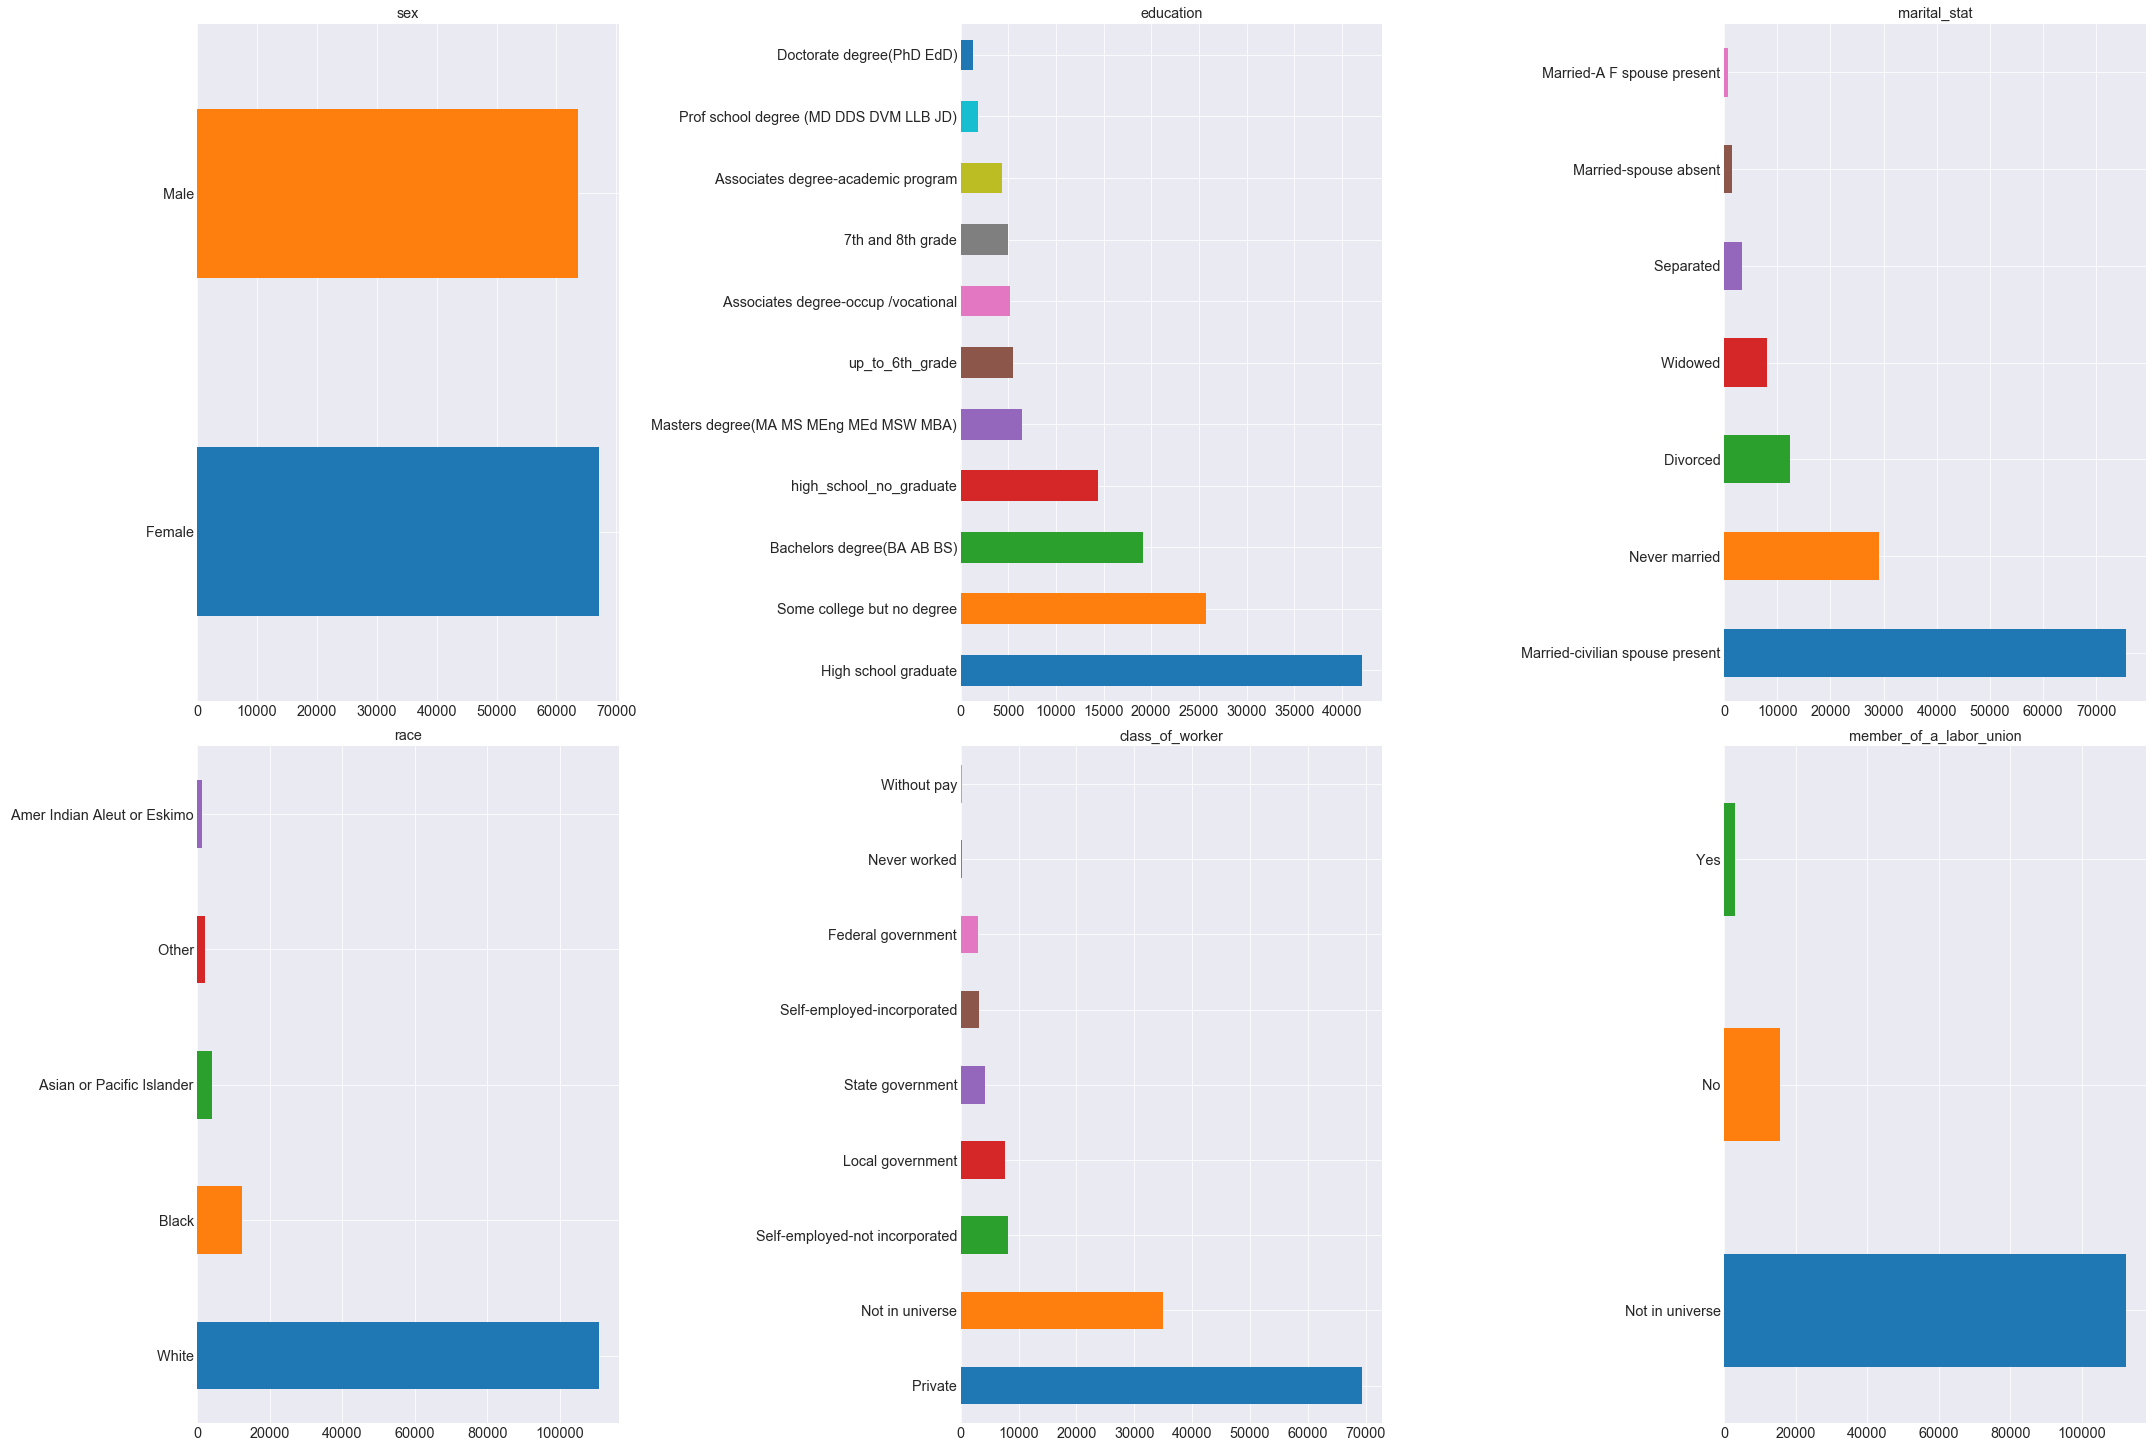

In [27]:
# Visualizing a few of the categorical variables
cat_vars = ['sex', 'education', 'marital_stat', 'race', 'class_of_worker', 'member_of_a_labor_union']
Visualizations(df_income_learn_over_18, cat_vars).categorical_bars()

In [28]:
# create dummy variables
df_income_learn_with_dummies = pd.get_dummies(df_income_learn_over_18.astype(str))
df_income_learn_with_dummies.head()

,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,major_industry_code_ Mining,major_industry_code_ Not in universe or children,major_industry_code_ Other professional services,major_industry_code_ Personal services except private HH,major_industry_code_ Private household services,major_industry_code_ Public administration,major_industry_code_ Retail trade,...,country_of_birth_self_ El-Salvador,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_1,veterans_benefits_2,year_94,year_95
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
# same for test
df_income_test_with_dummies = pd.get_dummies(df_income_test_over_18.astype(str))
df_income_test_with_dummies.head()

,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,major_industry_code_ Mining,major_industry_code_ Not in universe or children,major_industry_code_ Other professional services,major_industry_code_ Personal services except private HH,major_industry_code_ Private household services,major_industry_code_ Public administration,major_industry_code_ Retail trade,...,country_of_birth_self_ El-Salvador,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_1,veterans_benefits_2,year_94,year_95
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
list(set([col for col in df_income_learn_with_dummies.columns]) - set([col for col in df_income_test_with_dummies.columns]))

['detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily']

In [30]:
df_merged_learn = pd.concat([df_income_learn_cont, df_income_learn_with_dummies], axis=1)
df_merged_test = pd.concat([df_income_test_cont, df_income_test_with_dummies], axis=1)

In [31]:
# Merge with label
df_merged_learn_with_label = pd.concat([df_merged_learn, income_learn_label], axis=1)
df_merged_test_with_label = pd.concat([df_merged_test, income_test_label], axis=1)

In [32]:
df_merged_learn_with_label.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,...,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_1,veterans_benefits_2,year_94,year_95,income
1,58,0.000000,0.000000,0.0,0.0,1,52,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0
2,18,0.000000,0.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
5,48,83.130074,0.000000,0.0,0.0,1,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0

In [33]:
df_merged_test_with_label.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,...,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_1,veterans_benefits_2,year_94,year_95,income
0,38,0.0,0.0,0.0,0.000000,4,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,44,0.0,0.0,0.0,286.319914,1,26,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
3,35,0.0,0.0,0.0,0.000000,5,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,

In [34]:
# pickle new dataframes
df_merged_learn_with_label.to_pickle('data/df_merged_learn.pkl')
df_merged_test_with_label.to_pickle('data/df_merged_test.pkl')

Now the data is ready for modeling.